In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Coursework_1_data(1).csv')

# DATA EXPLORATION

## Basic exploration

In [283]:
data.head()   #Lets take a first look from data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


As we cam see from the data we have 17 X input features  and 1  Y label "Revenue"

We can see that he dataset consists of 9 numerical and 9 categorical attributes.

Categorical=SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue

Numerial=Administrative, Administrative_Duration, Informational, Informational_Duration,ProductRelated, ProductRelated_Duration ,BounceRates, ExitRates ,PageValues

In [284]:
#Lets take a second closer look at data
(data.shape)
(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

We can see we mainly have numeric  int64 and float64.We also have two object Values for Month and Visitor Type and two bool values for Weekend and Revenue. 

The dataset consists of 9 numerical and 9 categorical attributes.

Categorical=SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue

Numerial=Administrative, Administrative_Duration,  Informational,  Informational_Duration,ProductRelated,   ProductRelated_Duration ,BounceRates ExitRates ,PageValues   

False    10422
True      1908
Name: Revenue, dtype: int64

In [2]:
data['Revenue'].value_counts() 
plt.title('Revenue Counts')
plt.bar('False',10422)
plt.bar('True',1908)
plt.show()

NameError: name 'data' is not defined

In order to know the relationship between de Features we will use the correlation between a pair of variables, 

This is measure in a range type [-1, 1] where 1 indicates full linear relationship, 0 no linear relationship, -1 negatively linear relationship.



In [287]:
corr_matrix = data.corr()
print(corr_matrix)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

Since we are dealing with a lot of features in the correlation matrix we could filter the matrix for values only >0.5 for possitive correlation and <-0.5 for negative correlation in order  to know if there exist a strong correlaction 



In [288]:
print(corr_matrix>0.5)

                         Administrative  Administrative_Duration  \
Administrative                     True                     True   
Administrative_Duration            True                     True   
Informational                     False                    False   
Informational_Duration            False                    False   
ProductRelated                    False                    False   
ProductRelated_Duration           False                    False   
BounceRates                       False                    False   
ExitRates                         False                    False   
PageValues                        False                    False   
SpecialDay                        False                    False   
OperatingSystems                  False                    False   
Browser                           False                    False   
Region                            False                    False   
TrafficType                       False         

In [289]:
print(corr_matrix<-0.5)

                         Administrative  Administrative_Duration  \
Administrative                    False                    False   
Administrative_Duration           False                    False   
Informational                     False                    False   
Informational_Duration            False                    False   
ProductRelated                    False                    False   
ProductRelated_Duration           False                    False   
BounceRates                       False                    False   
ExitRates                         False                    False   
PageValues                        False                    False   
SpecialDay                        False                    False   
OperatingSystems                  False                    False   
Browser                           False                    False   
Region                            False                    False   
TrafficType                       False         

The analysys show us that there are not Features with a strong  negative linear relationship and most of the Features have no linear relationship

However we have a sighly positive liner relationship between the following features. Where we have order it from highest to lowest ratio,

1. Bounce Rates and Exit Rates
2. ProductRelated and Product Related Duration

And much with a much less relationship we also have:

3. Administrative and Administrative_Duration
4. Informational and Informational Duration


We can use  a scatter plot to visualize each pair of valuables as points in the plane


Text(0.5,1,'Relationship between BounceRates and Exit Rates')

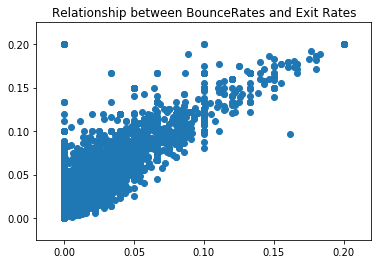

In [290]:
plt.scatter(data['BounceRates'],data['ExitRates'])
plt.title('Relationship between BounceRates and Exit Rates')


Text(0.5,1,'Relationship  between ProductRelated Duration and Product Related ')

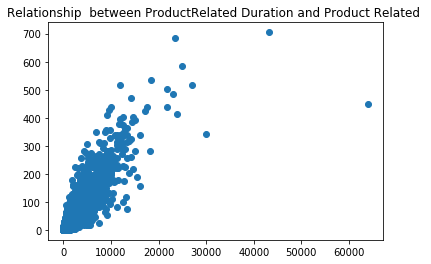

In [291]:
plt.scatter(data['ProductRelated_Duration'],data['ProductRelated'])
plt.title('Relationship  between ProductRelated Duration and Product Related ')

Text(0.5,1,'Relationship  between Administrative_Duration and Administrative')

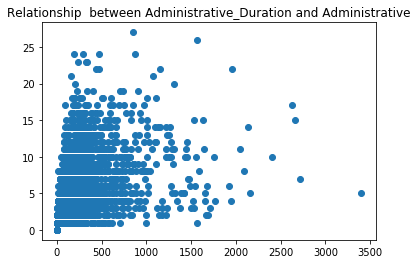

In [292]:
plt.scatter(data['Administrative_Duration'],data['Administrative'])
plt.title('Relationship  between Administrative_Duration and Administrative')

Text(0.5,1,'Relationship  between Informational and Informational_Duration')

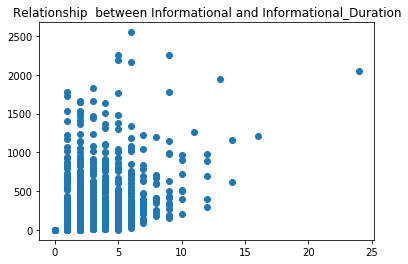

In [293]:
plt.scatter(data['Informational'],data['Informational_Duration'])
plt.title('Relationship  between Informational and Informational_Duration')

In [295]:
#Lets execute a Five-number summary of a distribution 
(data.describe())


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [1]:
data.boxplot()

NameError: name 'data' is not defined

 We can see that  Product Related_Duration,Administritative_Duration and Informational_Duration are the features with the biggest standard deviation.We can take a closer look to this features using box plots and histograms:

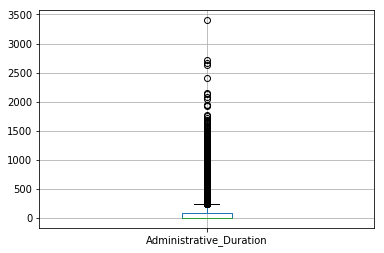

In [296]:
data[['Administrative_Duration']].boxplot()

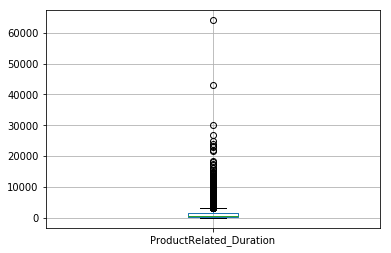

In [297]:
data[['ProductRelated_Duration']].boxplot()

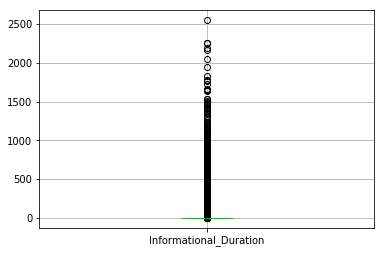

In [298]:
data[['Informational_Duration']].boxplot()

From the boxplots we can see that Informational Duration has a big amount of Outliers,i.e points beyond whiskers and this points are so far from the median.

Finally,we are going to create an histogram to analyse the frecuencie distribution of data features.

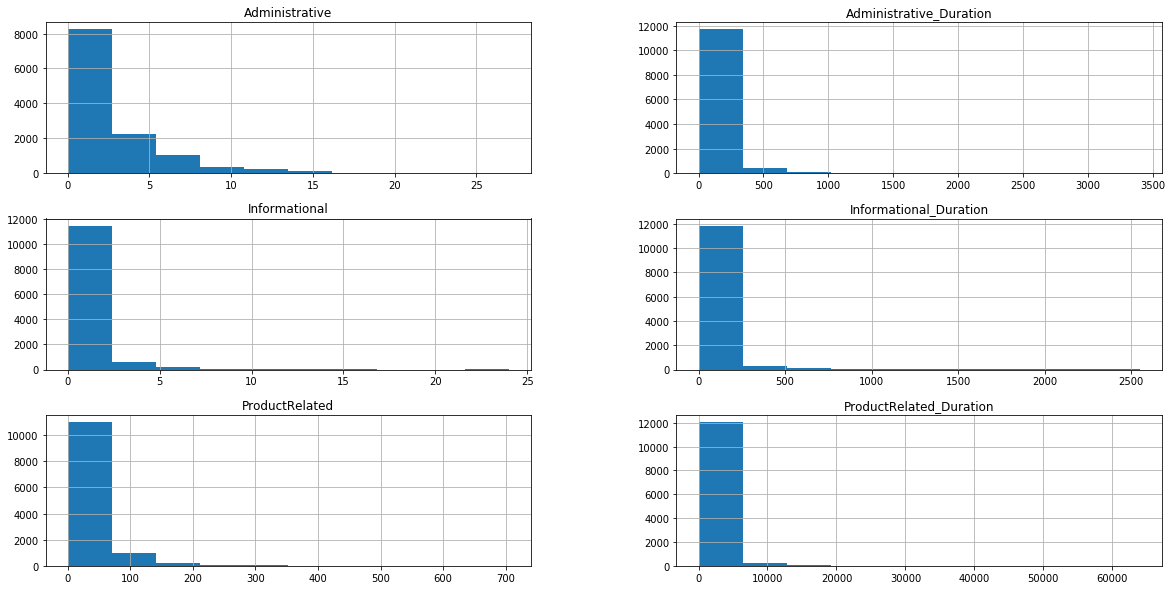

In [299]:
from matplotlib.pyplot import figure
fig=(data[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]).hist(figsize=(20, 10))


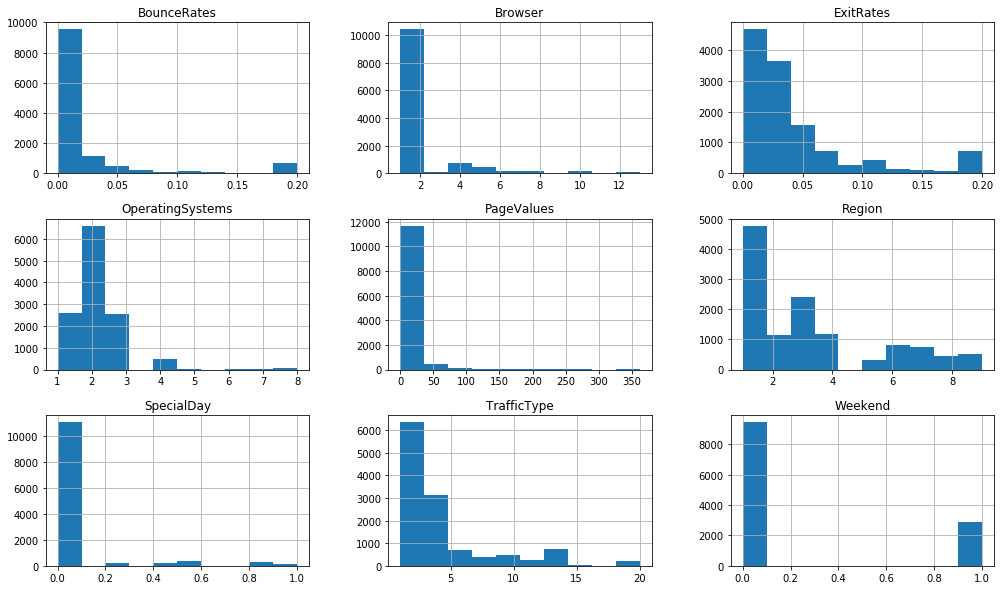

In [300]:
fig=(data[['BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','Weekend']]).hist(figsize=(17, 10))


From the the histograms we can see that Exit Rates and Region present the data more distributed than the other features.Other features in which data is distributed are , although in less proportion, : OperatingSystems, Traffic Type and Administrative.

# DATA PRE-PROCESSING

**1.Dealing with missing values**

We first check if there are missing qualities in each component, 0 for no missing worth or the number for the quantity of missing qualities.

In [3]:
data.isnull().sum()   

NameError: name 'data' is not defined

As we can see from above, there are not missing values within the dataset.Thus,in this particular case no further action is required.

**2.Encoding categorical features**

The dataset consists of 10 numerical and 8 categorical attributes.

Categorical=SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue

Numerial=Administrative, Administrative_Duration,  Informational,  Informational_Duration,ProductRelated,   ProductRelated_Duration ,BounceRates ExitRates ,PageValues   

For the 8 categorical attributes : 4 are still catageorical in the dataset (Month,Visitor Type,Weekend and Revenue and will ned too be transformed into numeric values on the pre-processing part.)
The other 5 categorical values SpecialDay,OperatingSystems,Browser,Region,TrafficType have alredy been converted to numerical values in the dataset,so no further action is required

In [302]:
#We will use label Encoder in order to transform categorical values to machine-readable values

In [303]:
from  sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [304]:
labencoder=preprocessing.LabelEncoder()

In [305]:
data['Month']=labencoder.fit_transform(data['Month'])
data['Month'].unique()

data['VisitorType']=labencoder.fit_transform(data['VisitorType'])
data['VisitorType'].unique()

data['Weekend']=labencoder.fit_transform(data['Weekend'])
data['Weekend'].unique()

data['Revenue']=labencoder.fit_transform(data['Revenue'])
data['Revenue'].unique()

array([0, 1], dtype=int64)

**3.Feature selection **

In [329]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=dataenc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
Y=dataenc.iloc[:,[14]]

Selectbestfeatures=SelectKBest(score_func=chi2,k=10)

train=Selectbestfeatures.fit(X,Y)
datascores=pd.DataFrame(train.scores_)
datacolumns=pd.DataFrame(X.columns)

Scores_features=pd.concat([datacolumns,datascores],axis=1)
Scores_features.columns=['Features','Score']
print(Scores_features.nlargest(10,'Score'))  #the TOP 10 most important features are:


                   Features          Score
5   ProductRelated_Duration  877404.339415
8                PageValues  175126.808512
1   Administrative_Duration   41754.836841
3    Informational_Duration   35059.775770
4            ProductRelated   19317.285376
0            Administrative    1133.965531
2             Informational     357.981605
10                    Month      86.163696
9                SpecialDay      53.797094
15              VisitorType      37.547523
6               BounceRates      29.654336
7                 ExitRates      28.985072


In [347]:
datapreprocessed=data.drop(columns=['OperatingSystems', 'Browser','Region','TrafficType','Weekend',])
X=datapreprocessed.iloc[:,:-1].values
y=datapreprocessed.iloc[:,12].values


**4.Feature scaling**

We will use this pre-processing tehcnique to reduce extreme boundary values in some features

In [353]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
minMax_scale = MinMaxScaler()   # to default range [0, 1]
datapreprocessed['Administrative_Duration'] = minMax_scale.fit_transform(data[['Administrative_Duration']])
datapreprocessed['Informational_Duration'] = minMax_scale.fit_transform(data[['Informational_Duration']])
datapreprocessed['ProductRelated_Duration'] = minMax_scale.fit_transform(data[['ProductRelated_Duration']])
datapreprocessed['ProductRelated'] = minMax_scale.fit_transform(data[['ProductRelated']])
datapreprocessed['PageValues'] = minMax_scale.fit_transform(data[['PageValues']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model implementation 

**1.K-Neighbors**



In [340]:
from sklearn.neighbors import KNeighborsClassifier



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Text(0,0.5,'Mean Error')

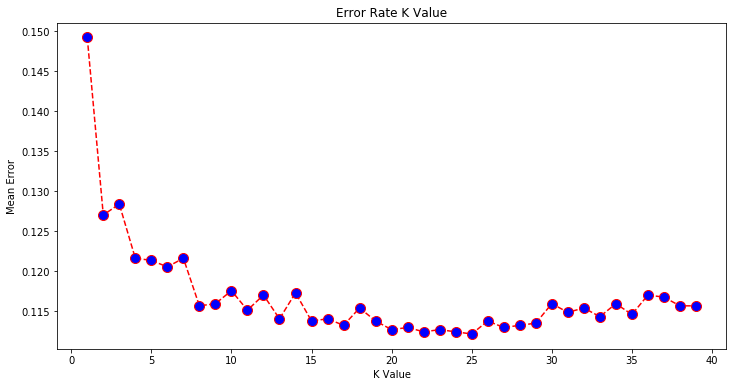

In [342]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [354]:
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)

**2. Support Vector Machines**

In [355]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred2 = svclassifier.predict(X_test)


**3.Decision trees
**

In [356]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_test)

# Performance Evaluation

 **1.K-eighbors**


In [357]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[3060   63]
 [ 354  222]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3123
          1       0.78      0.39      0.52       576

avg / total       0.88      0.89      0.87      3699



**2. Support Vector Machines**

In [358]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[3055   68]
 [ 353  223]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3123
          1       0.77      0.39      0.51       576

avg / total       0.88      0.89      0.87      3699



**3.Decision Trees**

In [359]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[2832  291]
 [ 249  327]]
             precision    recall  f1-score   support

          0       0.92      0.91      0.91      3123
          1       0.53      0.57      0.55       576

avg / total       0.86      0.85      0.86      3699

